In [8]:
import pandas as pd
import numpy as np
import scipy as sp
from datetime import datetime
import pickle
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, classification_report
import matplotlib.pyplot as plt
from IPython.display import display
from sklearn.tree import DecisionTreeClassifier, plot_tree
from comparers import ModelComparer, plot_decision_boundary
from baseline import print_rules, plot_tree_leafs_for_class
from util import RuleClassifier
from tasks.feature_ignored import make_task

In [3]:
clf_a, clf_b, X, y, feature_names = make_task()

In [4]:
comparer = ModelComparer(clf_a, clf_b, feature_names)

# General Explanations

In [5]:
is_pred_diff = comparer.predict_bin_diff(X)
mclass_diff = comparer.predict_mclass_diff(X)
class_names = comparer.class_names

In [6]:
def explain(max_depth=None, tree_fig_size=(28, 14)):
    global tree
    tree = DecisionTreeClassifier(max_depth=max_depth)
    tree.fit(X, mclass_diff)
    
    feature_importances = tree.feature_importances_
    feature_order = np.flip(np.argsort(feature_importances))
    fig, ax = plt.subplots(figsize=(5, 2))
    ax.set_title('Relative feature importance')
    ax.scatter(np.flip(feature_importances[feature_order]),
               np.flip(comparer.feature_names[feature_order]))
    ax.set_xlim((-0.05, ax.get_xlim()[1]))
    plt.show()
    
    fig, ax = plt.subplots(figsize=(14, 14))
    plot_tree(tree, feature_names=feature_names, class_names=class_names, ax=ax, node_ids=True, precision=2)
    
    for focus_class in comparer.difference_class_names:
        print(focus_class)
        print_rules(tree, feature_names, class_names, focus_class, X_test=X, y_test=mclass_diff, precision=2)
    
    plot_tree_leafs_for_class(tree, class_names, comparer.difference_class_names, X, mclass_diff, class_names, feature_names)
        
    print('\ndata evaluation:')
    print(classification_report(mclass_diff, tree.predict(X), target_names=class_names))

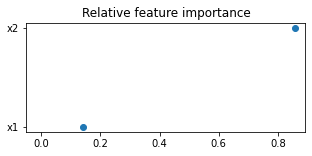

(0, 1)
node #11: if (x1 > 177.14) and (x2 > 20.33) and (x2 <= 140.13) then class (0, 1) (covers 0.867 of 15 instances)
(1, 0)
node #4: if (x1 <= 60.56) and (x2 > -28.23) and (x2 <= 20.33) then class (1, 0) (covers 1.0 of 14 instances)

data evaluation:
              precision    recall  f1-score   support

      (0, 0)       0.99      1.00      1.00       114
      (0, 1)       0.87      0.59      0.70        22
      (1, 0)       1.00      0.93      0.97        15
      (1, 1)       0.94      0.99      0.96       149

    accuracy                           0.96       300
   macro avg       0.95      0.88      0.91       300
weighted avg       0.96      0.96      0.96       300



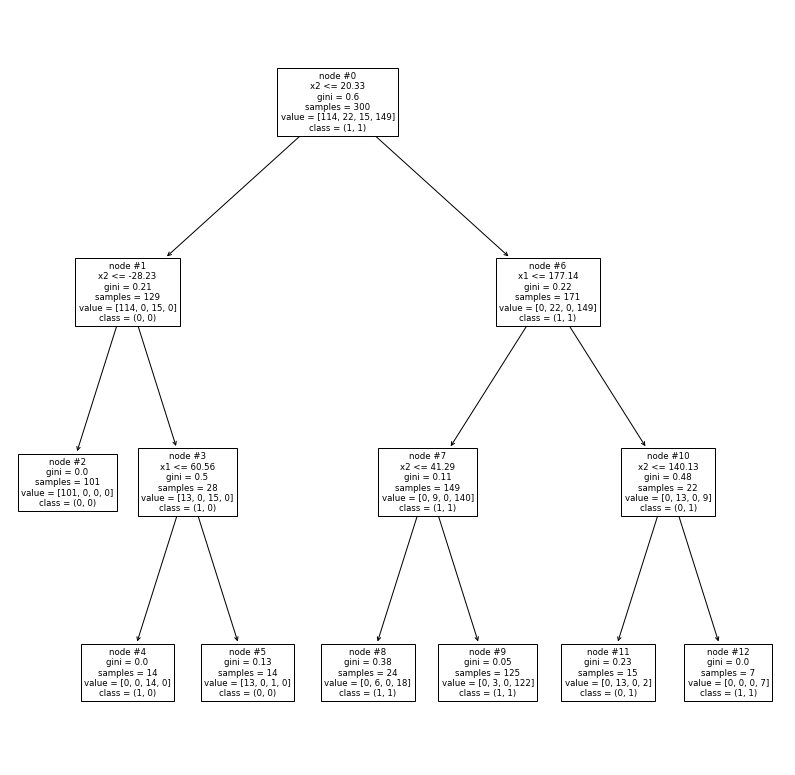

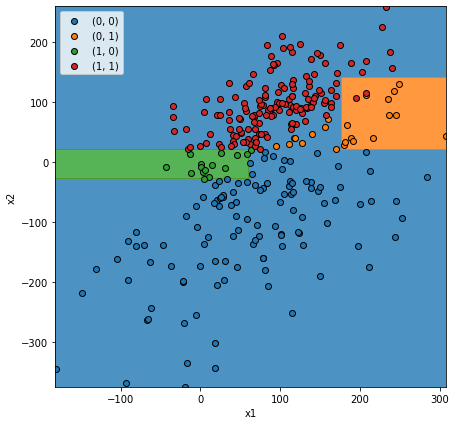

In [9]:
explain(max_depth=3)

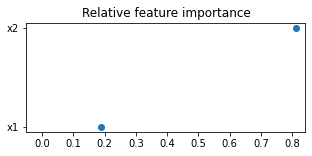

(0, 1)
node #18: if (x1 > 177.14) and (x2 > 20.33) and (x2 <= 105.92) then class (0, 1) (covers 1.0 of 10 instances)
node #12: if (x1 > 84.53) and (x1 <= 177.14) and (x2 > 20.33) and (x2 <= 41.29) then class (0, 1) (covers 1.0 of 6 instances)
node #19: if (x1 > 177.14) and (x2 > 105.92) and (x2 <= 140.13) then class (0, 1) (covers 0.6 of 5 instances)
(1, 0)
node #4: if (x1 <= 60.56) and (x2 > -28.23) and (x2 <= 20.33) then class (1, 0) (covers 1.0 of 14 instances)
node #7: if (x1 > 60.56) and (x2 > 18.09) and (x2 <= 20.33) then class (1, 0) (covers 1.0 of 1 instances)

data evaluation:
              precision    recall  f1-score   support

      (0, 0)       1.00      1.00      1.00       114
      (0, 1)       0.90      0.86      0.88        22
      (1, 0)       1.00      1.00      1.00        15
      (1, 1)       0.98      0.99      0.98       149

    accuracy                           0.98       300
   macro avg       0.97      0.96      0.97       300
weighted avg       0.98    

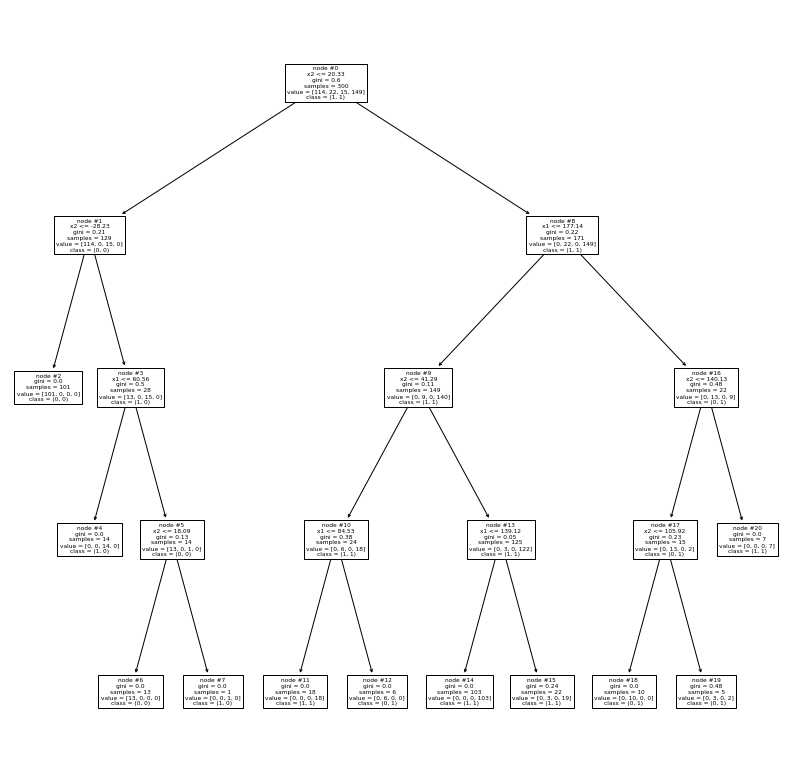

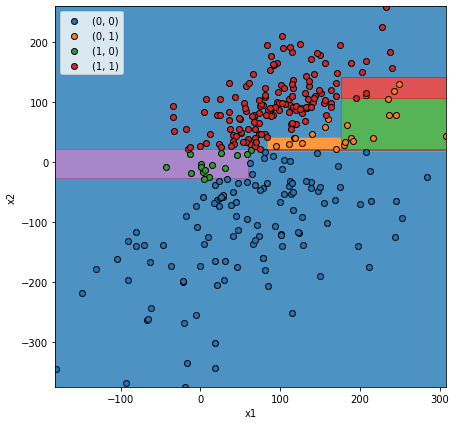

In [11]:
explain(max_depth=4)

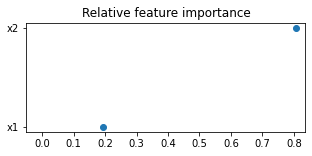

(0, 1)
node #20: if (x1 > 177.14) and (x2 > 20.33) and (x2 <= 105.92) then class (0, 1) (covers 1.0 of 10 instances)
node #12: if (x1 > 84.53) and (x1 <= 177.14) and (x2 > 20.33) and (x2 <= 41.29) then class (0, 1) (covers 1.0 of 6 instances)
node #23: if (x1 > 207.74) and (x2 > 105.92) and (x2 <= 140.13) then class (0, 1) (covers 1.0 of 3 instances)
node #16: if (x1 > 139.12) and (x1 <= 177.14) and (x2 > 41.29) and (x2 <= 74.68) then class (0, 1) (covers 1.0 of 3 instances)
(1, 0)
node #4: if (x1 <= 60.56) and (x2 > -28.23) and (x2 <= 20.33) then class (1, 0) (covers 1.0 of 14 instances)
node #7: if (x1 > 60.56) and (x2 > 18.09) and (x2 <= 20.33) then class (1, 0) (covers 1.0 of 1 instances)

data evaluation:
              precision    recall  f1-score   support

      (0, 0)       1.00      1.00      1.00       114
      (0, 1)       1.00      1.00      1.00        22
      (1, 0)       1.00      1.00      1.00        15
      (1, 1)       1.00      1.00      1.00       149

    accu

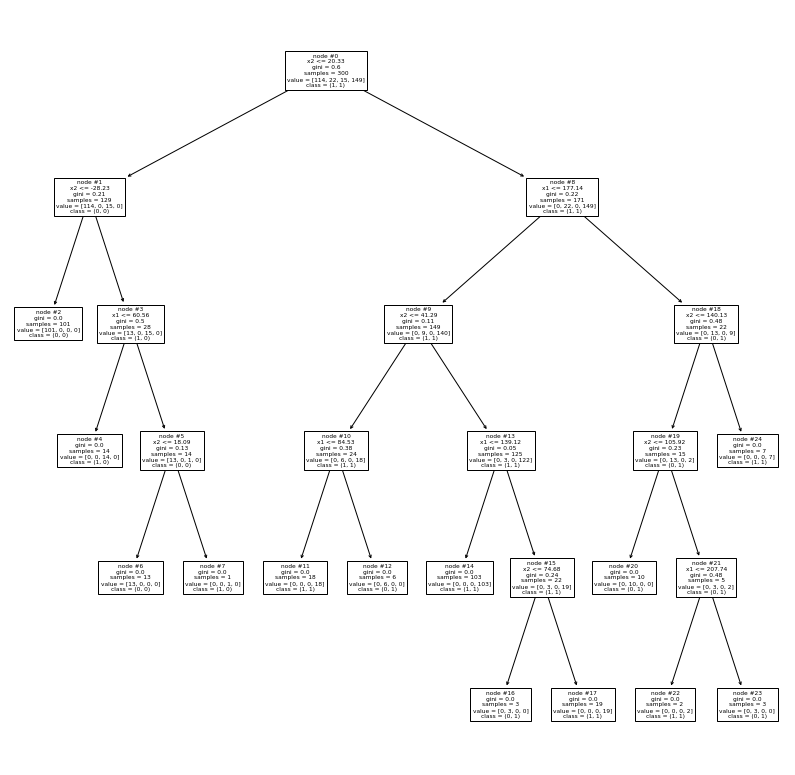

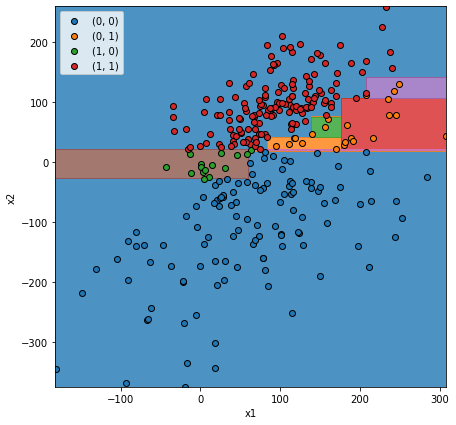

In [12]:
explain(max_depth=5)